### Import Libraries and modules

In [1]:
# Installing and Importing Keras to the Colab Notebook
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Here we are importing numpy library so that we can work on large multidimentional arrays
import numpy as np
# Importing required modules from keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
# Importing the MNIST database from datasets in keras 
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


xTrain Shape :  (60000, 28, 28)
xTest Shape  :  (10000, 28, 28)


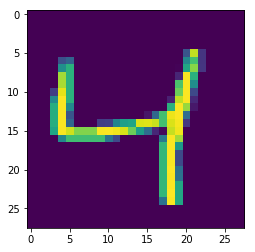

In [4]:
# Printing the shape of the trainig set and test set images 
print ("xTrain Shape : ",X_train.shape) # Training Set 60000 images of size 28x28
print ("xTest Shape  : ",X_test.shape)  # Testing  Set 10000 images of size 28x28
# Importing pyplot from matplotloib
from matplotlib import pyplot as plt
%matplotlib inline
# Showing sample image in the training dataset
plt.imshow(X_train[2])

In [5]:
# Reshaping the training and testing images to 28x28 of 1 channel
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print ("xTrain new shape : ",X_train.shape)
print ("xTest  new shape : ",X_test.shape) 

xTrain new shape :  (60000, 28, 28, 1)
xTest  new shape :  (10000, 28, 28, 1)


In [0]:
# Making training & testing velues between 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# Show the values of first 10 elements in training dataset
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
# Print the values of first 10 elements in training dataset in one-shot
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
# Importing activation and maxpooling modules
from keras.layers import Activation, MaxPooling2D, BatchNormalization
# Creating Sequential Model
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # Convolution 1 -> 28x28 - 26x26 ; RF 3x3 ; CH 32
model.add(Convolution2D(32, 3, 3, activation='relu')) # 24x24x64

model.add(Convolution2D(16, 1, 1)) # 
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22

model.add(Convolution2D(32, 3, 3, activation='relu')) # 20
model.add(Convolution2D(16, 1, 1)) # 
model.add(MaxPooling2D(pool_size=(2,2))) # 10


model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(Convolution2D(16, 1, 1)) # 

model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3, activation='relu')) # 5
model.add(Convolution2D(64, 3, 3, activation='relu')) # 
model.add(Convolution2D(16, 1, 1)) # 

model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3, activation='relu')) # 
model.add(Convolution2D(10, 1, 1, activation='relu'))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        528       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=15, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_13'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 8, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()